In [1]:
from keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 41s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

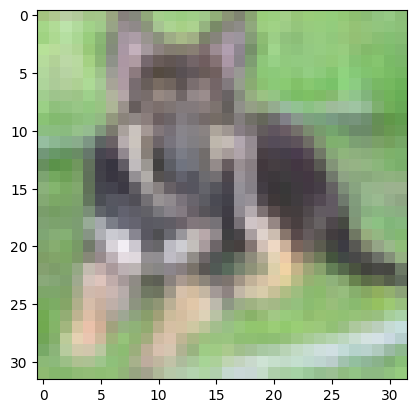

In [7]:
plt.imshow(X_train[156])

In [8]:
X_train.max()

255

In [9]:
X_train=X_train/255

In [10]:
X_test=X_test/255

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
from keras.utils import to_categorical

In [13]:
y_cat_train=to_categorical(y_train,10)

In [14]:
y_cat_test=to_categorical(y_test,10)

In [18]:
from keras.models import Sequential

In [20]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten


In [21]:
model=Sequential()

In [24]:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.fit(X_train,y_cat_train,verbose=2,epochs=5)

Epoch 1/5
1563/1563 - 11s - 7ms/step - accuracy: 0.6147 - loss: 1.0829
Epoch 2/5
1563/1563 - 10s - 6ms/step - accuracy: 0.6310 - loss: 1.0371
Epoch 3/5
1563/1563 - 10s - 6ms/step - accuracy: 0.6480 - loss: 0.9938
Epoch 4/5
1563/1563 - 9s - 6ms/step - accuracy: 0.6627 - loss: 0.9603
Epoch 5/5
1563/1563 - 10s - 6ms/step - accuracy: 0.6720 - loss: 0.9321


In [27]:
model.metrics_names

['loss', 'compile_metrics']

In [28]:
model.evaluate(X_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6285 - loss: 1.0541


[1.060589075088501, 0.6284000277519226]

In [29]:
from sklearn.metrics import classification_report

In [30]:
predictions=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [32]:
import numpy as np
predicted_classes = np.argmax(predictions, axis=1)

if y_test.ndim != 1:  # This checks if y_test is one-hot encoded
    y_test = np.argmax(y_test, axis=1)

# Now use classification_report
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       1.00      0.11      0.19     10000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.11     10000
   macro avg       0.10      0.01      0.02     10000
weighted avg       1.00      0.11      0.19     10000



C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
